In [29]:
from scipy.linalg import svd
import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [30]:
a = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)
u, s, vh = svd(a)

In [31]:
u @ u.T.conjugate()

array([[ 1.+0.j,  0.+0.j, -0.-0.j, -0.+0.j],
       [ 0.-0.j,  1.+0.j, -0.+0.j, -0.-0.j],
       [-0.+0.j, -0.-0.j,  1.+0.j, -0.+0.j],
       [-0.-0.j, -0.+0.j, -0.-0.j,  1.+0.j]])

In [32]:
vh @ vh.T.conjugate()

array([[ 1.+0.j, -0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j],
       [-0.-0.j,  1.+0.j, -0.+0.j, -0.-0.j,  0.+0.j],
       [ 0.+0.j, -0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [-0.-0.j, -0.+0.j,  0.-0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.-0.j,  0.-0.j,  0.-0.j,  1.+0.j]])

In [33]:
s

array([3.084, 1.114, 0.91 , 0.542])

In [34]:
a = np.random.rand(4, 5)
u, s, vh = svd(a)

In [36]:
u[0, :, np.newaxis] @ vh[np.newaxis, 0, :]

array([[0.192, 0.299, 0.163, 0.203, 0.383],
       [0.228, 0.356, 0.193, 0.241, 0.455],
       [0.126, 0.196, 0.107, 0.133, 0.252],
       [0.058, 0.091, 0.049, 0.061, 0.116]])

In [37]:
np.outer(u[0, :], vh[0, :])

array([[0.192, 0.299, 0.163, 0.203, 0.383],
       [0.228, 0.356, 0.193, 0.241, 0.455],
       [0.126, 0.196, 0.107, 0.133, 0.252],
       [0.058, 0.091, 0.049, 0.061, 0.116]])

In [39]:
ar = np.zeros_like(a)
for i in range(4):
  ar += np.outer(u[:, i], s[i] * vh[i, :])

In [40]:
a - ar # a and ar are identical

array([[-0.,  0., -0., -0., -0.],
       [ 0., -0., -0., -0.,  0.],
       [ 0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0.,  0.,  0.]])

In [41]:
a = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(a)

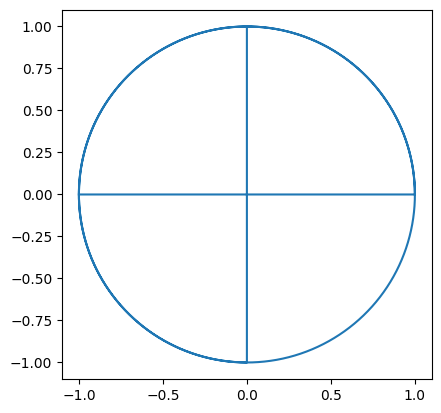

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
def show(c):
  plt.plot(c[0, :], c[1, :])
  plt.axis('image');
# plot the unit circle and axis segments:t = np.linspace(0, 3.5 * np.pi , num=300)
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
c = np.array([np.concatenate([l, np.cos(t), z]),np.concatenate([z, np.sin(t), l])])
show(c)

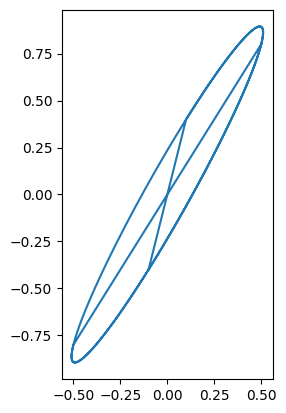

In [44]:
show(a @ c)

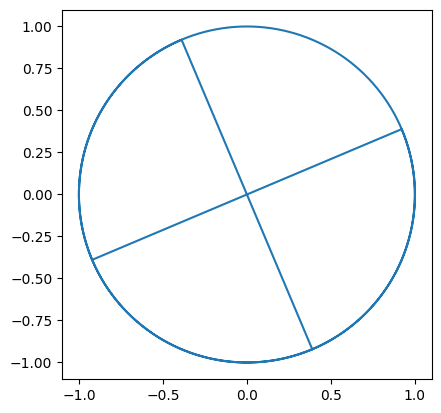

In [45]:
show(vh @ c)

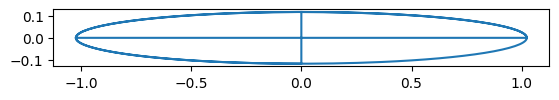

In [46]:
show(np.diag(s) @ c)

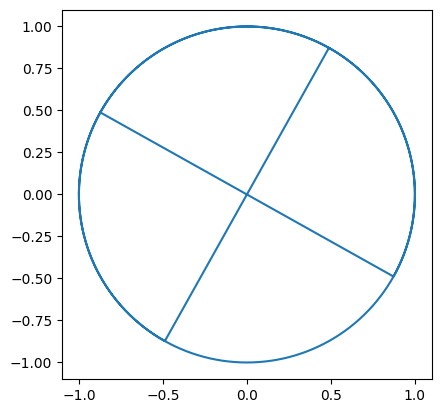

In [47]:
show(u @ c)

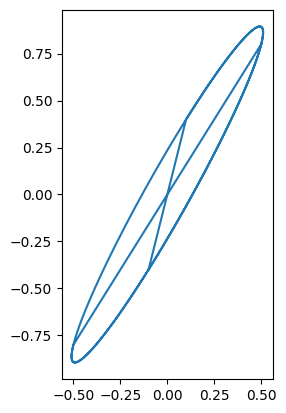

In [48]:
show(u @ np.diag(s) @ vh @ c)

In [49]:
cats = plt.imread('/content/cat_image.jpeg')
cats.shape

(1500, 1000, 3)

In [50]:
np.linalg.norm(cats[..., 0] - cats[..., 2], 'fro')

39157.07019172911

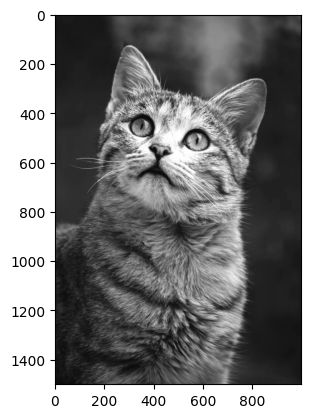

In [51]:
c = cats[..., 0]
plt.imshow(c, cmap='gray');

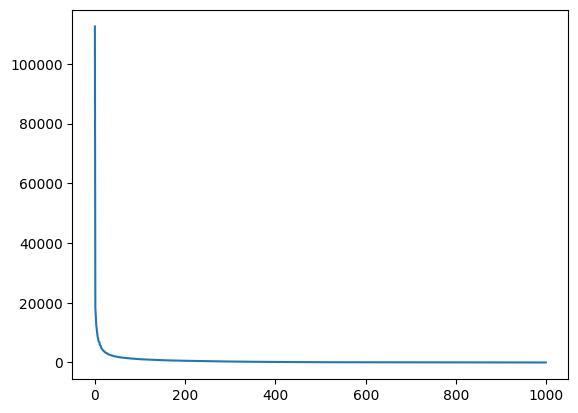

In [52]:
u, s, vh = svd(c)
plt.plot(s);

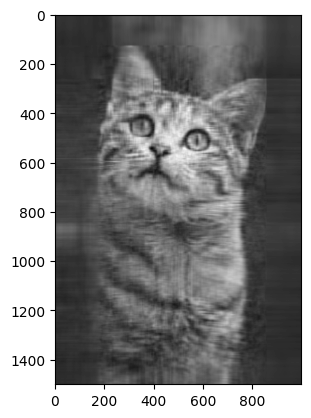

In [54]:
#  Rank 20 approximation of the cats:
l = 20; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

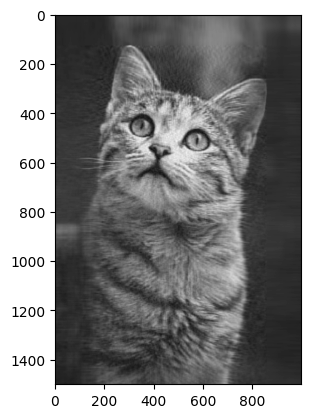

In [55]:
#  Rank 50 approximation of the cats:
l = 50; cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]
plt.imshow(cl, cmap='gray');

In [57]:
relative_error = 1.e-1

In [59]:
s2 = s**2
total = np.sum(s2)
diff = np.sqrt((total - np.add.accumulate(s2)) / total)
l = np.argmax(diff < relative_error) + 1
l

69

In [60]:
cl = u[:, :l] @ np.diag(s[:l]) @ vh[:l, :]

In [61]:
np.linalg.norm(c - cl, 'fro') / np.linalg.norm(c, 'fro')

0.09965726511160178

In [62]:
u.shape[0] * l + l + l * vh.shape[0]

172569

In [63]:
c.shape[0] * c.shape[1]

1500000